In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

In [11]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Define paths to your dataset
train_images_path = "/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assingment 4/final/aiHub.v1i.yolov8/train/images"
train_labels_path = "/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assingment 4/final/aiHub.v1i.yolov8/train/labels"
val_images_path = "/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assingment 4/final/aiHub.v1i.yolov8/valid/images"
val_labels_path = "/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assingment 4/final/aiHub.v1i.yolov8/valid/labels"
test_images_path = "/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assingment 4/final/aiHub.v1i.yolov8/test/images"

In [14]:
# Define augmentation parameters
# You can adjust these parameters based on your requirements
rotation_range = 10
zoom_range = 0.1
horizontal_flip = True

In [15]:
def augment_data(image, label):
    # Random rotation
    angle = np.random.uniform(-rotation_range, rotation_range)
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Random zoom
    zoom = np.random.uniform(1 - zoom_range, 1 + zoom_range)
    image = cv2.resize(image, None, fx=zoom, fy=zoom)

    # Random horizontal flip
    if horizontal_flip and np.random.random() < 0.5:
        image = cv2.flip(image, 1)
        if len(label) > 0:
            if len(label.shape) == 1:
                label[1] = 1 - label[1]  # Flip x-coordinate
            else:
                label[:, 1] = 1 - label[:, 1]  # Flip x-coordinates

    return image, label

In [16]:
# Function to save augmented image and labels
def save_augmented_data(image, labels, image_path, label_path):
    # Save image
    cv2.imwrite(image_path, image)

    # Save labels
    with open(label_path, 'w') as file:
        for label in labels:
            file.write(" ".join([str(x) for x in label]) + "\n")

In [17]:
import numpy as np

def read_labels(label_path):
    labels = []
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            values = line.strip().split()
            # Convert class label to float to handle floating-point labels
            label = [float(values[0]), float(values[1]), float(values[2]), float(values[3]), float(values[4])]
            labels.append(label)
    return np.array(labels)

In [18]:
from tqdm import tqdm

# Define the suffix for augmented files
aug_suffix = "_augmented"

# Perform augmentation for train set
for image_file in tqdm(os.listdir(train_images_path)):
    image_path = os.path.join(train_images_path, image_file)
    label_path = os.path.join(train_labels_path, image_file[:-3] + "txt")
    image = cv2.imread(image_path)
    labels = read_labels(label_path)
    image_aug, labels_aug = augment_data(image, labels)

    # Define new file paths for augmented data
    new_image_path = os.path.join(train_images_path, os.path.splitext(image_file)[0] + aug_suffix + os.path.splitext(image_file)[1])
    new_label_path = os.path.join(train_labels_path, os.path.splitext(image_file)[0] + aug_suffix + ".txt")

    # Save augmented data
    save_augmented_data(image_aug, labels_aug, new_image_path, new_label_path)

  0%|          | 0/1068 [00:00<?, ?it/s]

100%|██████████| 1068/1068 [00:02<00:00, 531.96it/s]


Step 2: Prepare the dataset for train, validation, and test.
Performed it manually, we splitted the training dataset into train and validation sets and included in the previous step itself. We already have the test dataset ready.

Step 3: Plot some random images from the train, test, and validation set. (2 points)

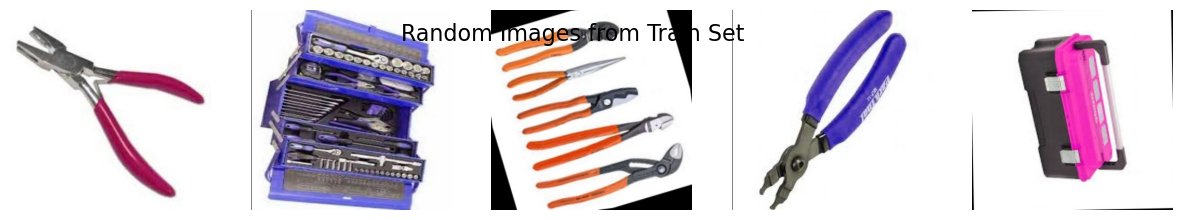

In [19]:
import os
import random
import matplotlib.pyplot as plt
import cv2

def plot_random_images(image_dir, num_images=5, set_type='Train'):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle(f"Random Images from {set_type} Set", fontsize=16)

    for i in range(num_images):
        random_image = random.choice(os.listdir(image_dir))
        image_path = os.path.join(image_dir, random_image)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
        axes[i].imshow(image)
        axes[i].axis('off')

    plt.subplots_adjust(top= 1.5)
    plt.show()

# Plot random images from augmented train set
plot_random_images(train_images_path, set_type='Train')

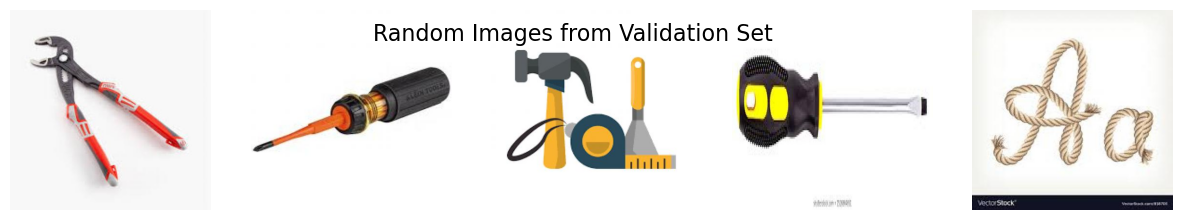

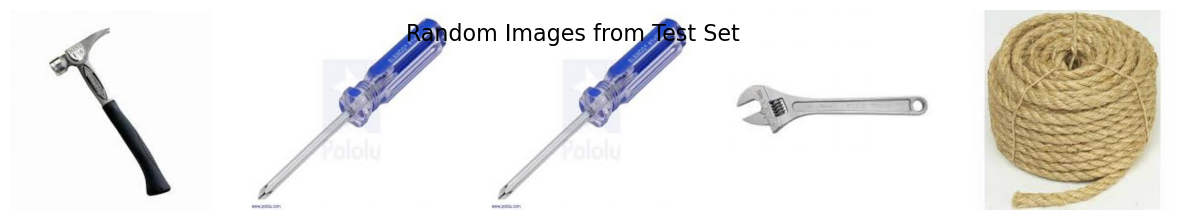

In [20]:
# Plot random images from augmented validation set
plot_random_images(val_images_path, set_type='Validation')

# Plot random images from test set
plot_random_images(test_images_path, set_type = 'Test')

In [21]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [22]:
import torch
print(torch.cuda.get_device_name(0))  # For the first GPU
print(torch.cuda.get_device_properties(0))  # Detailed properties of the GPU


AssertionError: Torch not compiled with CUDA enabled

In [23]:
sudo apt update
sudo apt install nvidia-driver-GPU

SyntaxError: invalid syntax (3662534719.py, line 1)